In [1]:
import math

In [2]:
def FastModulo(b, p, d):
  """
  b = base
  p = power
  d = modulor
  """
  i = 1
  while p > i: i = i << 1
  i = i >> 1
  r = 1
  while i > 0:
    r = (r * r) % d
    if p & i:
      r = (r * b) % d
    i = i >> 1
  return r

In [3]:
def GCD(m, n):
  if m < n:
    m, n = n, m
  if n == 0:
    return m
  else:
    return GCD(n, m % n)

In [4]:
# https://www.geeksforgeeks.org/euclidean-algorithms-basic-and-extended/
def GCDExtended(d, f):
  """
  Extended Euclidian Algorithm
  dd' = 1 mod f
  return gcd, csi, cbi
  """
  if d == 0:
    return f, 0, 1
  else:
    gcd, x, y = GCDExtended(f % d, d)
    return gcd, (y - (f // d) * x), x

In [5]:
def gcdExt(d, f): # using to calculate the d parameter
  gcd, csi, cbi = GCDExtended(d, f)
  if csi < 0:
    return f + csi # make positive
  else:
    return csi

In [6]:
def PrimeNumbers(index):
  """
  Too slow. throw it!
  """
  i = PrimeNumbers.primes[-1]
  while len(PrimeNumbers.primes) <= index:
    i = i + 2
    p = True
    for k in PrimeNumbers.primes:
      if i % k == 0:
        p = False
        break
    if p:
      PrimeNumbers.primes.append(i)
  return PrimeNumbers.primes[index]
PrimeNumbers.primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29,
                     31, 37, 41, 43, 47, 53, 59, 61, 67,
                     71, 73, 79, 83, 89, 97, 101, 103,
                     107, 109, 113, 127, 131, 137, 139,
                     149, 151, 157, 163, 167, 173, 179,
                     181, 191, 193, 197, 199, 211, 223,
                     227, 229, 233, 239, 241, 251, 257,
                     263, 269, 271, 277, 281, 283, 293,
                     307, 311, 313, 317, 331, 337, 347, 349]




#
# https://www.geeksforgeeks.org/how-to-generate-large-prime-numbers-for-rsa-algorithm/
#

# Large Prime Generation for RSA
import random
 
# Pre generated primes
first_primes_list = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29,
                     31, 37, 41, 43, 47, 53, 59, 61, 67,
                     71, 73, 79, 83, 89, 97, 101, 103,
                     107, 109, 113, 127, 131, 137, 139,
                     149, 151, 157, 163, 167, 173, 179,
                     181, 191, 193, 197, 199, 211, 223,
                     227, 229, 233, 239, 241, 251, 257,
                     263, 269, 271, 277, 281, 283, 293,
                     307, 311, 313, 317, 331, 337, 347, 349]
 
def nBitRandom(n):
    return random.randrange(2**(n-1)+1, 2**n - 1)
 
def getLowLevelPrime(n):
    '''Generate a prime candidate divisible
    by first primes'''
    while True:
        # Obtain a random number
        pc = nBitRandom(n)
 
         # Test divisibility by pre-generated
         # primes
        for divisor in first_primes_list:
            if pc % divisor == 0 and divisor**2 <= pc:
                break
        else: return pc
 
def isPrimeNumber(mrc):
    if mrc <= first_primes_list[-1]:
      return mrc in first_primes_list
    '''Run 20 iterations of Rabin Miller Primality test'''
    maxDivisionsByTwo = 0
    ec = mrc-1
    while ec % 2 == 0:
        ec >>= 1
        maxDivisionsByTwo += 1
    assert(2**maxDivisionsByTwo * ec == mrc-1)
 
    def trialComposite(round_tester):
        if pow(round_tester, ec, mrc) == 1:
            return False
        for i in range(maxDivisionsByTwo):
            if pow(round_tester, 2**i * ec, mrc) == mrc-1:
                return False
        return True
 
    # Set number of trials here
    numberOfRabinTrials = 20
    for i in range(numberOfRabinTrials):
        round_tester = random.randrange(2, mrc)
        if trialComposite(round_tester):
            return False
    return True

def nBitPrimeRandom(bits):
  while True:
    prime_candidate = getLowLevelPrime(bits)
    if isPrimeNumber(prime_candidate):
      return prime_candidate

In [7]:
# https://stackoverflow.com/questions/2654149/bit-length-of-a-positive-integer-in-python
def num_of_bits(n):
  return len('{:b}'.format(n))

In [30]:
def splitBit(v, n):
  kv = []
  while v > 0:
    t = v % n
    v = v // n
    kv.append(t)
  return kv

def mergeBit(bits, n):
  v = 0
  while len(bits) > 0:
    v = v * n
    v = v + bits.pop()
  return v

# RSA

In [9]:
def RSA(key_size = None, p = None, q = None):
  def nprime(n):
    if n < 5:
      return PrimeNumbers(random.randrange(1, 10))
    return nBitPrimeRandom(n)
  
  def gcdExt(d, f): # using to calculate the d parameter
    gcd, csi, cbi = GCDExtended(d, f)
    if csi < 0:
      return f + csi # make positive
    else:
      return csi
  
  k = 0
  if None == key_size:
    if not isPrimeNumber(p) or not isPrimeNumber(q):
      raise Exception("p or q is not prime number.")
    # if p * q < 21:
    #   raise Exception("p or q is too small. p*q must be larger than 20.")

    k = (num_of_bits(p) + num_of_bits(q)) // 2 + 1
  else:
    if key_size < 3:
      raise Exception("key_size is too small. key_size must be larger than 2 bit.")
    p = nprime(key_size)
    q = nprime(key_size)
    k = key_size

  n = p * q
  pi = (p - 1) * (q - 1)
  e = nprime(k)
  d = -1
  try_count = 0
  while True:
    if math.log2(n) <= e and e != p and e != q and e != pi and GCD(e, pi) == 1: # check e // https://crypto.stackexchange.com/questions/87018/rsa-algorithm-must-e-be-less-than-varphin
      d = gcdExt(e, pi)
      if d > 0 and d != e:  # check d
        break
      elif 10 < try_count:
        raise Exception("Can't find acceptable d. Please try another p,q.")
      try_count = try_count + 1
    e = nprime(k)

  print("n:", n, " p:", p, " q:", q)
  print("e:", e, " d:", d)

  def enc(value):
    tokens = splitBit(value, n)
    result = []
    for token in tokens:
      result.append(FastModulo(token, e, n))
    return mergeBit(result, n)

  def dec(value):
    tokens = splitBit(value, n)
    result = []
    for token in tokens:
      result.append(FastModulo(token, d, n))
    return mergeBit(result, n)
  return enc, dec

In [10]:
enc, dec = RSA(p=3,q=5)

n: 15  p: 3  q: 5
e: 23  d: 7


In [11]:
cipher = enc(535)
print(cipher)
print(dec(cipher))

1885
535


# ElGamal

## Key generation
* 큰 소수 p, p 보다 작은 임의의 g, x 선택
* Y = (g^x) mod p
* Public key: Y, p, q
* Private key: x

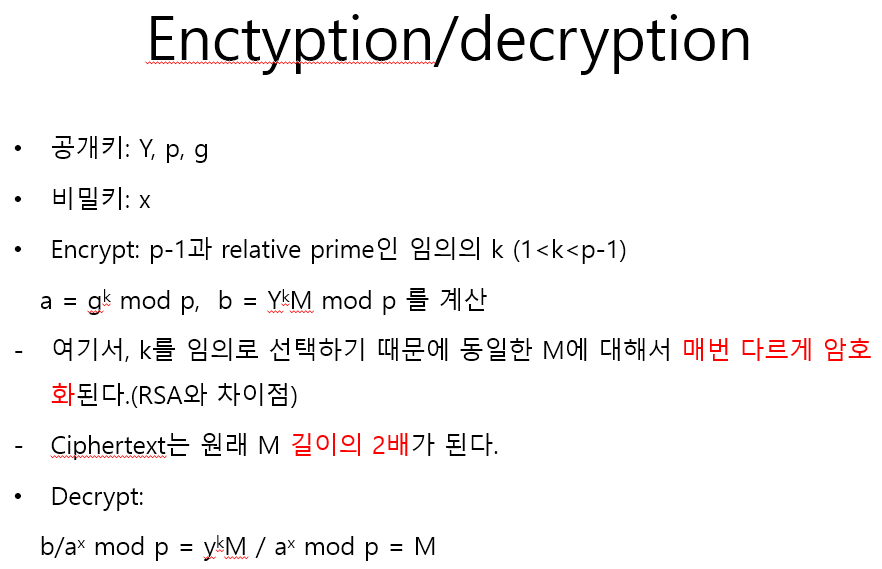

In [12]:
def ElGamal(key_size = None, p = None, g = None, x = None):
  # utility functions ==========================
  def nprime(n):
    if n < 5:
      return PrimeNumbers(random.randrange(1, 10))
    return nBitPrimeRandom(n)
  
  def generateKey(p, bitSize, keySet):
    key = random.randint( bitSize, p )
    while key in keySet:
      key = random.randint( bitSize, p )
    return key
  
  # key validation =============================
  if None == key_size:
    if p < g or p < x:
      raise Exception("g or x is must less than p.")
    elif g == x:
      raise Exception("g and x is same.")
    elif not isPrimeNumber(p):
      raise Exception("p is not prime number.")
    key_size = num_of_bits(p)
  else:
    if key_size < 3:
      raise Exception("key_size is too small. key_size must be larger than 2 bit.")
    p = nprime(key_size)
    g = random.randint( 2, p - 1 ) # 2 <= g < p-1
    x = generateKey( p, key_size // 2, (g,) )
  
  # algorithm ===================================
  Y = FastModulo(g, x, p)

  print("p:",p, " g:", g)
  print("x:",x, " Y:", Y)

  def enc(M, k = None):
    if k == None:
      k = generateKey( p, key_size // 2, (g,x) )
      print("k:", k)
    a = FastModulo(g, k, p) # ( g ** k ) % p
    b = M * FastModulo(Y, k, p) % p
    return a, b
  
  def dec(a, b):
    # a**(p - 1 - x) * b mod p
    e = FastModulo(a, p - 1 - x, p)
    m = (e * b) % p
    return m
  return enc, dec

In [13]:
enc,dec = ElGamal(key_size=16)

p: 44741  g: 27171
x: 40406  Y: 8880


In [14]:
a, b = enc (1423)
print(a, b)
dec(a, b)

k: 12387
41215 26137


1423

In [15]:
p, g, x, k = 13, 2, 9, 10
M = 11
Y = FastModulo(g, x, p)
print (p, g, Y)

13 2 5


In [16]:
FastModulo(g, k, p), (M * Y**k) % p

(10, 2)

In [17]:
(10**(p-1-x)*2) % p

11

In [18]:
p, g, x, k = 13, 2, 3, 5
M = 11

In [19]:
Y = g**x % p

In [20]:
p, g, Y

(13, 2, 8)

In [21]:
a, b = (g**k) %p, (Y**k * M) % p
a, b

(6, 10)

In [22]:
g, p, x = 2, 13, 7
Y = g**x % p
M = 2
k = 3
Y

11

In [23]:
a = g**k % p
b = (M*Y**k)%p 
a, b

(8, 10)

In [24]:
#dec
(a**(p-1-x) * b) % p

2

In [25]:
enc, dec =ElGamal(p=13, g=2, x=7)

p: 13  g: 2
x: 7  Y: 11


In [26]:
enc(11, k=5)

(6, 12)

In [27]:
(10-1) *  (26-1)

225

In [29]:
gcdExt(17, 72)

17

In [34]:
GCD(9,40)

1

In [35]:
13 % 7

6

In [36]:
10+9+8+7+6+5+4+3+2+1

55

In [38]:
a,n = 5, 7

In [43]:
c = 13


In [44]:
b = c % n

In [45]:
(a*b)%n

2

In [46]:
(a*c) %n


2